In [186]:
#! users/jjahn/dev/repos/matplot_challenges

import pandas as pd
from pandas import DataFrame, read_csv
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy
import random
import os

In [187]:
file1 = os.path.join('generated_data','city_data.csv')
file2 = os.path.join('generated_data','ride_data.csv')

cfile = pd.read_csv(file1)
rfile = pd.read_csv(file2)

In [188]:
cfile.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [189]:
rfile.head()

,city,date,fare,ride_id
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405
1,Melissaborough,2017-01-01 08:55:58,19.59,2791839504576
2,Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289
3,Curtismouth,2017-01-03 06:36:53,15.12,6557246300691
4,Port Michael,2017-01-03 09:56:52,19.65,9887635746234


In [190]:
# Average Fare ($) Per City
# Total Number of Rides Per City
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

f_df = pd.DataFrame(rfile['fare'].groupby(rfile['city']).sum()).rename(columns={'fare':'total fare'})
f_df['fare count'] = pd.DataFrame(rfile['fare'].groupby(rfile['city']).count())
f_df['avg. fare'] = f_df['total fare'] / f_df['fare count']
f_df = f_df.reset_index()
f_df.head()

,city,total fare,fare count,avg. fare
0,Adamschester,266.35,9,29.594444
1,Alexisfort,903.11,33,27.366970
2,Amberberg,457.99,16,28.624375
3,Anthonyfurt,501.35,17,29.491176
4,Boyleberg,161.98,5,32.396000


In [191]:
df = pd.merge(f_df, cfile, on='city', how='outer')
df.head()

,city,total fare,fare count,avg. fare,driver_count,type
0,Adamschester,266.35,9,29.594444,27,Suburban
1,Alexisfort,903.11,33,27.366970,24,Urban
2,Amberberg,457.99,16,28.624375,13,Suburban
3,Anthonyfurt,501.35,17,29.491176,17,Suburban
4,Boyleberg,161.98,5,32.396000,13,Suburban


In [192]:
table = df[['city','avg. fare', 'driver_count', 'type']]
table.head()

,city,avg. fare,driver_count,type
0,Adamschester,29.594444,27,Suburban
1,Alexisfort,27.366970,24,Urban
2,Amberberg,28.624375,13,Suburban
3,Anthonyfurt,29.491176,17,Suburban
4,Boyleberg,32.396000,13,Suburban


In [193]:

def multi_bubbles (xdf, x, y, g):
    ls = xdf[g].unique()
    plt.figure(figsize=(9,7))
    for i in ls:
        xg_df = xdf.loc[xdf[g] == i]
        plt.scatter( xg_df[x], xg_df[y], marker='o', facecolors=None, edgecolors='black', s=(xg_df[x]*10), alpha=0.50)

    plt.grid(linestyle='--', alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.suptitle(x +' vs '+y, fontsize=14, fontweight = 'bold')
    leg = plt.legend(ls, ncol=1, fontsize=12, borderaxespad=0, loc=1)
    leg.get_frame().set_linewidth(2.0)
    leg.get_frame().set_facecolor('white')
    

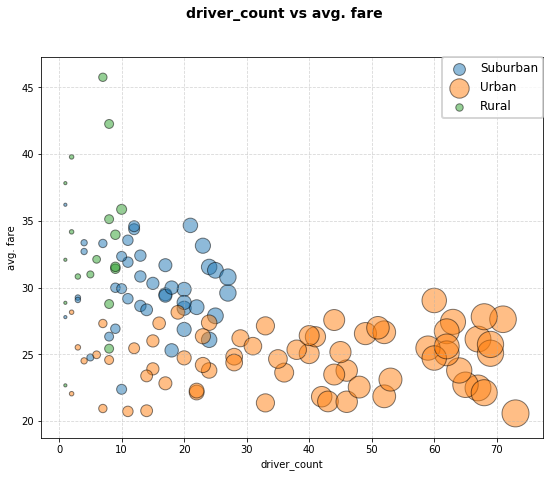

In [194]:
# relation between driver count vs average fare categorized by regional types
multi_bubbles (table, 'driver_count', 'avg. fare', 'type')

In [195]:
def pie_it (dataframe, x, y, f):
    if f == 'sum':
        tdf = pd.DataFrame(dataframe[y].groupby(dataframe[x]).sum())
    elif f == 'count':
        tdf = pd.DataFrame(dataframe[y].groupby(dataframe[x]).count()).rename(columns={y:y+' '+f})
        y = y+' '+f
    else:
        return 0
    tdf = tdf.reset_index()
    e = (0,0,0.1)
    pie = tdf[y].plot(kind='pie', labels=tdf[x], autopct='%1.1f%%', startangle=90, colors=None, shadow=True, explode=e, figsize=(7,7))
    pie.setxlabel = tdf[x]
    pie.setylabel = tdf[y]


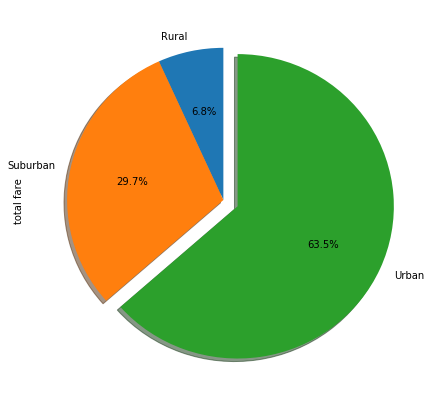

In [196]:
# % of Total Fares by City Type(function)
pie_it(df, 'type', 'total fare', 'sum')

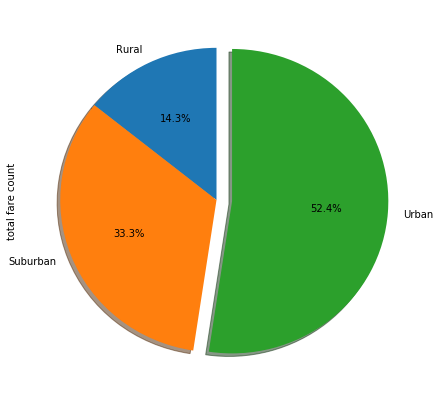

In [197]:
# % of Total Rides by City Type
pie_it(df, 'type', 'total fare', 'count')

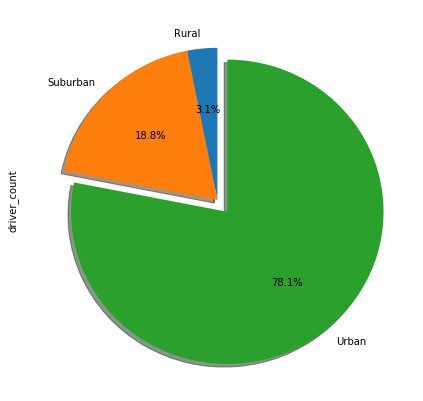

In [198]:
# % of Total Drivers by City Type
pie_it(df, 'type', 'driver_count', 'sum')